# SIRS with mobility and network structure: ANALYSIS

In this notebook the data collected through simulation is processed in order to produce the plots in the report. Different initializations and network structures are compared according to through metrics: the probability of extinction and the cumulative time of extinction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
from itertools import *
from operator import *
matplotlib.rcParams.update({'errorbar.capsize': 10})

# import custom module
import SIRS


%matplotlib inline

In [2]:
def extinction(I):
    
    '''
    Given a time series this function returns the timestamp when the series first reached 0 value
    and the total time spent with 0 value.
    
    Parameters
    ----------
    I : time series
    
    Returns
    -------
    time_first_ext : the time of first extinction (i.e. the index at which I == 0 for the first time)
    time_ext : list of lengths of intervals in which I == 0
    
    '''
       
    time_first_ext = []
    time_ext = []
    
    possible_ext_time = np.argwhere(I==0.)
    
    for key, group in groupby(enumerate(possible_ext_time), lambda x: x[0] - x[1]): 
        group = list(map(itemgetter(1), group)) 
        
        time_first_ext.append(group[0]) #first ext time
        time_ext.append(len(group))    #time of extinction
        
    return time_first_ext, time_ext

In [3]:
#epidemics parameters
beta = 0.075
mu = 0.15
gamma = 0.016

#mobility parameters
p_mob_list = np.linspace(0.03,0.2,20)
p_mob_list = np.concatenate([[0],p_mob_list])

#iterations
n_iter = 1000

# PLOT: SF(5) vs ER(0) vs SF(aggregated)

### loading data for SF(5)-ER(0) 

In [4]:
directory_name = "data_SF_ER/"+str(beta)+"_"+str(mu)+"_"+str(gamma)

n_runs = 100

In [5]:
ext_er=[] 
ext_sf=[] 
error_ext_er = []
error_ext_sf = []
t_ext_sum_er = []
t_ext_sum_sf = []
t_ext_std_er = []
t_ext_std_sf = []


for p_mob in p_mob_list:

    p_mob_dn = "/pmob_"+"{:3f}".format(p_mob)

    prob_ext_er = 0
    prob_ext_sf = 0
    t_ext_list_er = []
    t_ext_list_sf = []
    t_er = []
    t_sf = []
    
    list_dg_er = []
    list_dg_sf = []

    

    for run in range(n_runs):
        
        
        #extinction and time of extinction
        filename_er = directory_name+p_mob_dn+"/SIR_er_"+str(run)+".txt"
        filename_sf = directory_name+p_mob_dn+"/SIR_sf_"+str(run)+".txt"

        SIR_er = np.loadtxt(filename_er)
        SIR_sf = np.loadtxt(filename_sf)
                
        _ , time_ext_er = extinction(SIR_er[:,1])
        _ , time_ext_sf = extinction(SIR_sf[:,1])
        
        if p_mob != 0:    
            e_er = len(time_ext_er) > 1 #asymmetry in initialization
        else:
            e_er = np.any(SIR_er[:,1] == 0)  
        e_sf = np.any(SIR_sf[:,1] == 0)
        
        prob_ext_er += int(e_er)
        prob_ext_sf += int(e_sf)

        t_er.append(sum(time_ext_er)/n_iter)
        t_sf.append(sum(time_ext_sf)/n_iter)

      
    #computing comulative time of extinction    
    t_er = np.array(t_er)
    t_sf = np.array(t_sf)
    t_ext_sum_er.append(np.mean(t_er))
    t_ext_sum_sf.append(np.mean(t_sf)) 
    t_ext_std_er.append(np.std(t_er)/np.sqrt(n_runs))
    t_ext_std_sf.append(np.std(t_sf)/np.sqrt(n_runs))

    ext_er.append(prob_ext_er/n_runs)
    ext_sf.append(prob_ext_sf/n_runs)
    
        
        
#error on probability of extinction computed as binomial process        
ext_er=np.array(ext_er)       
ext_sf=np.array(ext_sf)       
error_ext_er  = np.sqrt(ext_er*(1-ext_er))/np.sqrt(n_runs)
error_ext_sf  = np.sqrt(ext_sf*(1-ext_sf))/np.sqrt(n_runs)

### loading data for SF(3)-SF(2) and aggregate them

In [6]:
directory_name = "data_SF_sym/"+str(beta)+"_"+str(mu)+"_"+str(gamma)
n_runs = 50

In [7]:
cumulative_t_ext = []
cumulative_t_ext_std = []
cumulative_ext = []
cumulative_error_ext = []

for p_mob in p_mob_list:

    p_mob_dn = "/pmob_"+"{:3f}".format(p_mob)

    prob_ext_sf2 = 0
    prob_ext_sf1 = 0
    cumulative_t = []
    t_sf2 = []
    t_sf1 = []
   

    for run in range(n_runs):
        
        
        #extinction and time of extinction
        filename_sf2 = directory_name+p_mob_dn+"/SIR_sf2_"+str(run)+".txt"
        filename_sf1 = directory_name+p_mob_dn+"/SIR_sf1_"+str(run)+".txt"

        SIR_sf2 = np.loadtxt(filename_sf2)
        SIR_sf1 = np.loadtxt(filename_sf1)
                
        _ , time_ext_sf2 = extinction(SIR_sf2[:,1])
        _ , time_ext_sf1 = extinction(SIR_sf1[:,1])
        
            
        e_sf2 = np.any(SIR_sf2[:,1] == 0)
        e_sf1 = np.any(SIR_sf1[:,1] == 0)
        
        prob_ext_sf2 += int(e_sf2)
        prob_ext_sf1 += int(e_sf1)

        t_sf2.append(sum(time_ext_sf2)/n_iter)
        t_sf1.append(sum(time_ext_sf1)/n_iter)
        
        
      
    #computing comulative time of extinction    
    t_sf2 = np.array(t_sf2)
    t_sf1 = np.array(t_sf1)
    
    cumulative_t = np.concatenate((t_sf2,t_sf1))
    cumulative_t_ext.append(np.mean(cumulative_t))
    cumulative_t_ext_std.append(np.std(cumulative_t)/np.sqrt(2*n_runs))

    cumulative_ext.append((prob_ext_sf2 + prob_ext_sf1)/(2*n_runs))
        
        
#error on probability of extinction computed as binomial process        
cumulative_ext = np.array(cumulative_ext)     
cumulative_error_ext  = np.sqrt(cumulative_ext*(1-cumulative_ext))/np.sqrt(2*n_runs)

### Plots

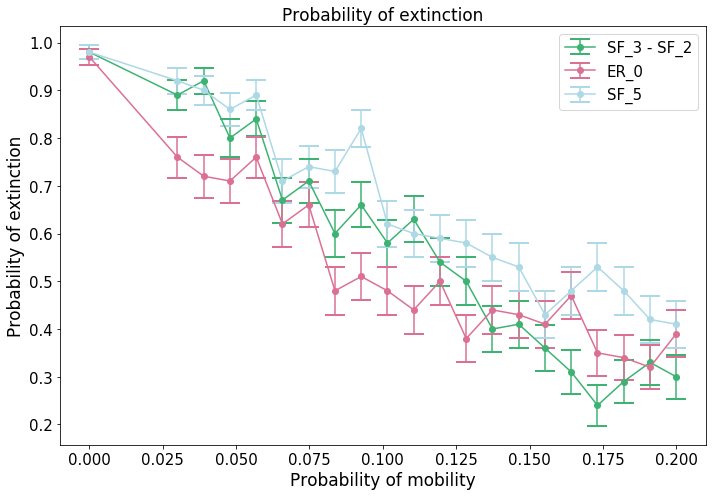

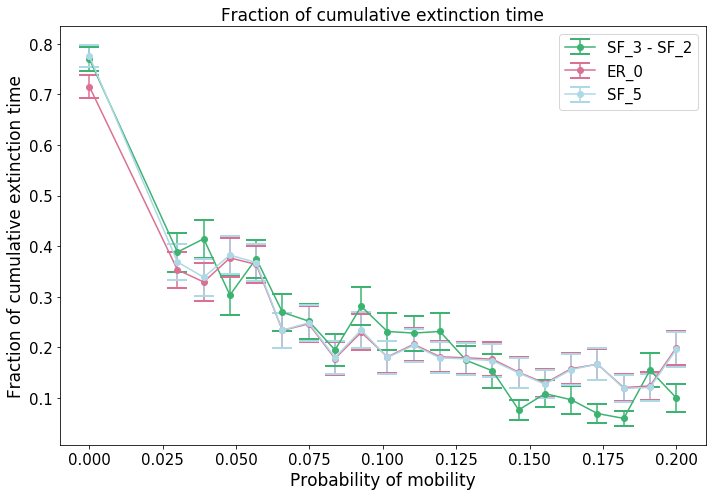

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.errorbar(p_mob_list, cumulative_ext, cumulative_error_ext, fmt="-o", marker="o", capthick=2, 
                                                       color="mediumseagreen", label="SF_3 - SF_2")
ax.errorbar(p_mob_list, ext_er, error_ext_er, fmt="-o", marker="o", capthick=2, 
                                                       color="palevioletred", label="ER_0")
ax.errorbar(p_mob_list, ext_sf, error_ext_sf, fmt="-o", marker="o", capthick=2, 
                                                       color="lightblue", label="SF_5")

ax.set_title("Probability of extinction", fontsize=17)
ax.set_xlabel("Probability of mobility", fontsize=17)
ax.set_ylabel("Probability of extinction", fontsize=17)
ax.legend(fontsize=15, loc='upper right')
ax.tick_params(labelsize=15)
fig.tight_layout()
title = "PEXT_coupled_networks_comparison.png"
fig.savefig(title)



fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.errorbar(p_mob_list, cumulative_t_ext, cumulative_t_ext_std, fmt="-o", marker="o", capthick=2, 
                                                       color="mediumseagreen", label="SF_3 - SF_2")
ax.errorbar(p_mob_list, t_ext_sum_er, t_ext_std_er, fmt="-o", marker="o", capthick=2, 
                                                       color="palevioletred", label="ER_0")
ax.errorbar(p_mob_list, t_ext_sum_sf, t_ext_std_sf, fmt="-o", marker="o", capthick=2, 
                                                       color="lightblue", label="SF_5")

ax.set_title("Fraction of cumulative extinction time", fontsize=17)
ax.set_xlabel("Probability of mobility", fontsize=17)
ax.set_ylabel("Fraction of cumulative extinction time", fontsize=17)
ax.legend(fontsize=15, loc='upper right')
ax.tick_params(labelsize=15)
           
fig.tight_layout()
title = "TEXT_coupled_networks_comparison.png"
fig.savefig(title)



# PLOT SF(5) VS ER(0) VS SF(5) VS SF(0)

### loading data for SF(5)-SF(0)

In [9]:
directory_name = "data_SF/"+str(beta)+"_"+str(mu)+"_"+str(gamma)
n_runs = 50

In [10]:
ext_sf2_asym=[] #will give me probability of extincion
ext_sf1_asym=[] #will give me probability of extincion
error_ext_sf2_asym = []
error_ext_sf1_asym = []
t_ext_sum_sf2_asym = []
t_ext_sum_sf1_asym = []
t_ext_std_sf2_asym = []
t_ext_std_sf1_asym = []

for p_mob in p_mob_list:

    p_mob_dn = "/pmob_"+"{:3f}".format(p_mob)

    #print(directory_name+p_mob_dn)

    prob_ext_sf2_asym = 0
    prob_ext_sf1_asym = 0
    t_ext_list_sf2_asym = []
    t_ext_list_sf1_asym = []
    t_sf2_asym = []
    t_sf1_asym = []

    

    for run in range(n_runs):
              
        
        #extinction and time of extinction
        filename_sf2_asym = directory_name+p_mob_dn+"/SIR_sf2_"+str(run)+".txt"
        filename_sf1_asym = directory_name+p_mob_dn+"/SIR_sf1_"+str(run)+".txt"

        SIR_sf2_asym = np.loadtxt(filename_sf2_asym)
        SIR_sf1_asym = np.loadtxt(filename_sf1_asym)
                
        _ , time_ext_sf2_asym = extinction(SIR_sf2_asym[:,1])
        _ , time_ext_sf1_asym = extinction(SIR_sf1_asym[:,1])
        
        if p_mob != 0:    
            e_sf2_asym = len(time_ext_sf2_asym) > 1 #asymmetry in initialization
        else:
            e_sf2_asym = np.any(SIR_sf2_asym[:,1] == 0)
        e_sf1_asym = np.any(SIR_sf1_asym[:,1] == 0)
        
        prob_ext_sf2_asym += int(e_sf2_asym)
        prob_ext_sf1_asym += int(e_sf1_asym)

        t_sf2_asym.append(sum(time_ext_sf2_asym)/n_iter)
        t_sf1_asym.append(sum(time_ext_sf1_asym)/n_iter)
        
        
    t_sf2_asym = np.array(t_sf2_asym)
    t_sf1_asym = np.array(t_sf1_asym)
    t_ext_sum_sf2_asym.append(np.mean(t_sf2_asym))
    t_ext_sum_sf1_asym.append(np.mean(t_sf1_asym)) 
    t_ext_std_sf2_asym.append(np.std(t_sf2_asym)/np.sqrt(n_runs))
    t_ext_std_sf1_asym.append(np.std(t_sf1_asym)/np.sqrt(n_runs))

    ext_sf2_asym.append(prob_ext_sf2_asym/n_runs)
    ext_sf1_asym.append(prob_ext_sf1_asym/n_runs)
    

    
#error on probability of extinction computed as binomial process        
ext_sf2_asym=np.array(ext_sf2_asym)       
ext_sf1_asym=np.array(ext_sf1_asym)       
error_ext_sf2_asym  = np.sqrt(ext_sf2_asym*(1-ext_sf2_asym))/np.sqrt(n_runs)
error_ext_sf1_asym  = np.sqrt(ext_sf1_asym*(1-ext_sf1_asym))/np.sqrt(n_runs)

### Plots

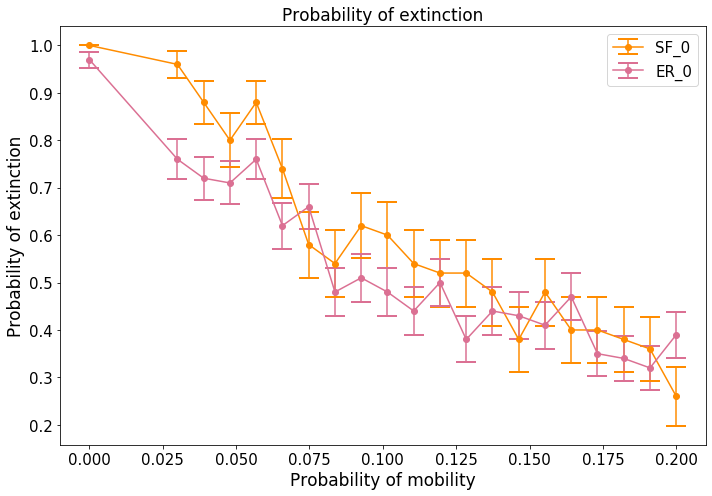

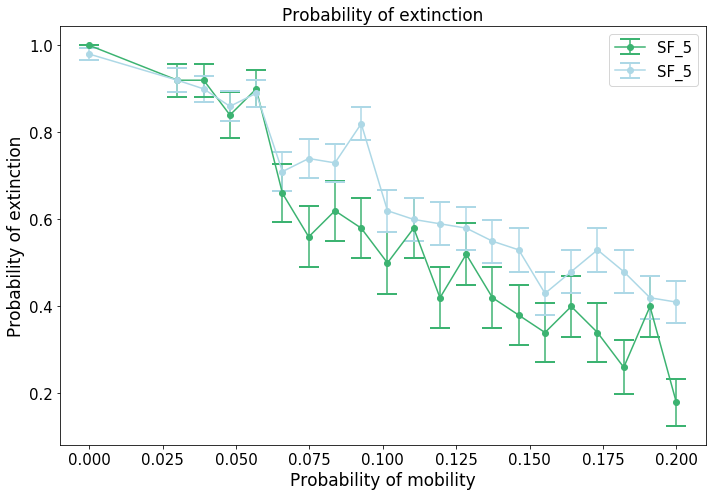

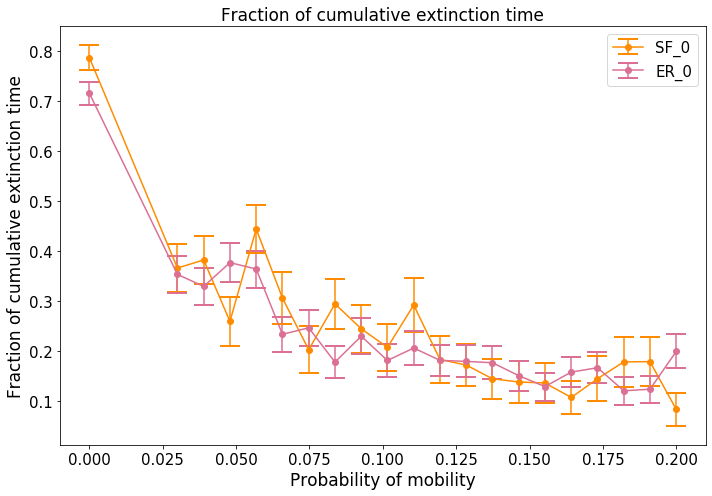

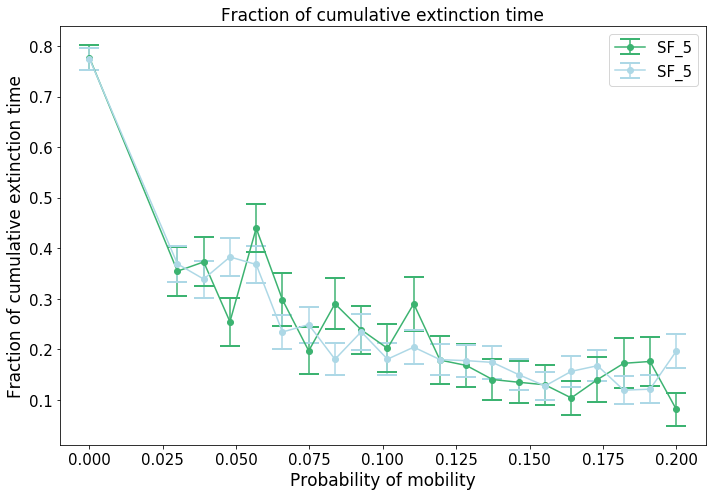

In [11]:
#PROBABILITY OF EXTINCTION
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.errorbar(p_mob_list, ext_sf2_asym, error_ext_sf2_asym, fmt="-o", marker="o", capthick=2, 
                                                       color="darkorange", label="SF_0")
ax.errorbar(p_mob_list, ext_er, error_ext_er, fmt="-o", marker="o", capthick=2, 
                                                       color="palevioletred", label="ER_0")


ax.set_title("Probability of extinction", fontsize=17)
ax.set_xlabel("Probability of mobility", fontsize=17)
ax.set_ylabel("Probability of extinction", fontsize=17)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15, loc='upper right')
fig.tight_layout()
title = "PEXT_coupled_networks_0.png"
fig.savefig(title)



fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.errorbar(p_mob_list, ext_sf1_asym, error_ext_sf1_asym, fmt="-o", marker="o", capthick=2, 
                                                       color="mediumseagreen", label="SF_5")
ax.errorbar(p_mob_list, ext_sf, error_ext_sf, fmt="-o", marker="o", capthick=2, 
                                                       color="lightblue", label="SF_5")
ax.set_title("Probability of extinction", fontsize=17)
ax.set_xlabel("Probability of mobility", fontsize=17)
ax.set_ylabel("Probability of extinction", fontsize=17)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15, loc='upper right')
fig.tight_layout()
title = "PEXT_coupled_networks_5.png"
fig.savefig(title)



#TIME
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.errorbar(p_mob_list, t_ext_sum_sf2_asym, t_ext_std_sf2_asym, fmt="-o", marker="o", capthick=2, 
                                                       color="darkorange", label="SF_0")
ax.errorbar(p_mob_list, t_ext_sum_er, t_ext_std_er, fmt="-o", marker="o", capthick=2, 
                                                       color="palevioletred", label="ER_0")


ax.set_title("Fraction of cumulative extinction time", fontsize=17)
ax.set_xlabel("Probability of mobility", fontsize=17)
ax.set_ylabel("Fraction of cumulative extinction time", fontsize=17)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15, loc='upper right')
fig.tight_layout()
title = "TEXT_coupled_networks_0.png"
fig.savefig(title)



fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.errorbar(p_mob_list, t_ext_sum_sf1_asym, t_ext_std_sf1_asym,  fmt="-o", marker="o", capthick=2, 
                                                       color="mediumseagreen", label="SF_5")
ax.errorbar(p_mob_list, t_ext_sum_sf, t_ext_std_sf, fmt="-o", marker="o", capthick=2, 
                                                       color="lightblue", label="SF_5")
ax.set_title("Fraction of cumulative extinction time", fontsize=17)
ax.set_xlabel("Probability of mobility", fontsize=17)
ax.set_ylabel("Fraction of cumulative extinction time", fontsize=17)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15, loc='upper right')
fig.tight_layout()
title = "TEXT_coupled_networks_5.png"
fig.savefig(title)

# PLOT SF(5) VS SF(0) VS SF(3) VS SF(2)

### loading data for SF(3)-SF(2)

In [12]:
directory_name = "data_SF_sym/"+str(beta)+"_"+str(mu)+"_"+str(gamma)
n_runs = 50

In [13]:
ext_sf2_sym=[] #will give me probability of extincion
ext_sf1_sym=[] #will give me probability of extincion
error_ext_sf2_sym = []
error_ext_sf1_sym = []
t_ext_sum_sf2_sym = []
t_ext_sum_sf1_sym = []
t_ext_std_sf2_sym = []
t_ext_std_sf1_sym = []

for p_mob in p_mob_list:

    p_mob_dn = "/pmob_"+"{:3f}".format(p_mob)

    #print(directory_name+p_mob_dn)

    prob_ext_sf2_sym = 0
    prob_ext_sf1_sym = 0
    t_ext_list_sf2_sym = []
    t_ext_list_sf1_sym = []
    t_sf2_sym = []
    t_sf1_sym = []

    

    for run in range(n_runs):
              
        
        #extinction and time of extinction
        filename_sf2_sym = directory_name+p_mob_dn+"/SIR_sf2_"+str(run)+".txt"
        filename_sf1_sym = directory_name+p_mob_dn+"/SIR_sf1_"+str(run)+".txt"

        SIR_sf2_sym = np.loadtxt(filename_sf2_sym)
        SIR_sf1_sym = np.loadtxt(filename_sf1_sym)
                
        _ , time_ext_sf2_sym = extinction(SIR_sf2_sym[:,1])
        _ , time_ext_sf1_sym = extinction(SIR_sf1_sym[:,1])
        
        e_sf2_sym = np.any(SIR_sf2_sym[:,1] == 0)
        e_sf1_sym = np.any(SIR_sf1_sym[:,1] == 0)
        
        prob_ext_sf2_sym += int(e_sf2_sym)
        prob_ext_sf1_sym += int(e_sf1_sym)

        t_sf2_sym.append(sum(time_ext_sf2_sym)/n_iter)
        t_sf1_sym.append(sum(time_ext_sf1_sym)/n_iter)
        
        t_ext_list_sf2_sym+=time_ext_sf2_sym
        t_ext_list_sf1_sym+=time_ext_sf1_sym
        
         
    #computing comulative time of extinction    
    t_sf2_sym = np.array(t_sf2_sym)
    t_sf1_sym = np.array(t_sf1_sym)
    t_ext_sum_sf2_sym.append(np.mean(t_sf2_sym))
    t_ext_sum_sf1_sym.append(np.mean(t_sf1_sym)) 
    t_ext_std_sf2_sym.append(np.std(t_sf2_sym)/np.sqrt(n_runs))
    t_ext_std_sf1_sym.append(np.std(t_sf1_sym)/np.sqrt(n_runs))

    ext_sf2_sym.append(prob_ext_sf2_sym/n_runs)
    ext_sf1_sym.append(prob_ext_sf1_sym/n_runs)
    
    #print(prob_ext_sf2_sym/n_runs)
        
        
#error on probability of extinction computed as binomial process        
ext_sf2_sym=np.array(ext_sf2_sym)       
ext_sf1_sym=np.array(ext_sf1_sym)       
error_ext_sf2_sym  = np.sqrt(ext_sf2_sym*(1-ext_sf2_sym))/np.sqrt(n_runs)
error_ext_sf1_sym  = np.sqrt(ext_sf1_sym*(1-ext_sf1_sym))/np.sqrt(n_runs)

### Plots

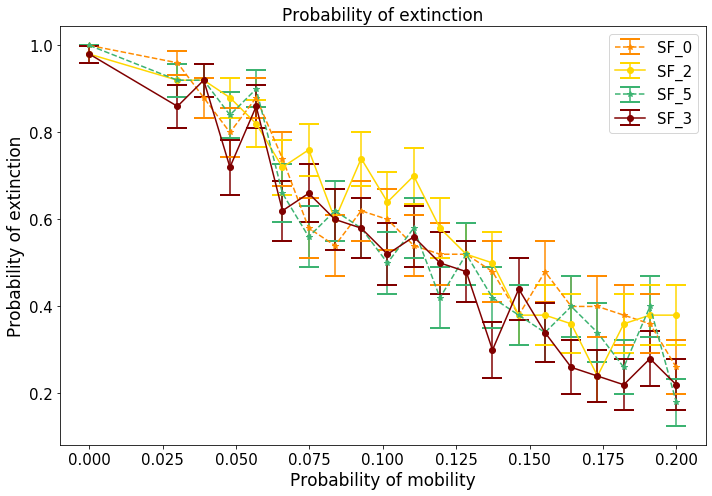

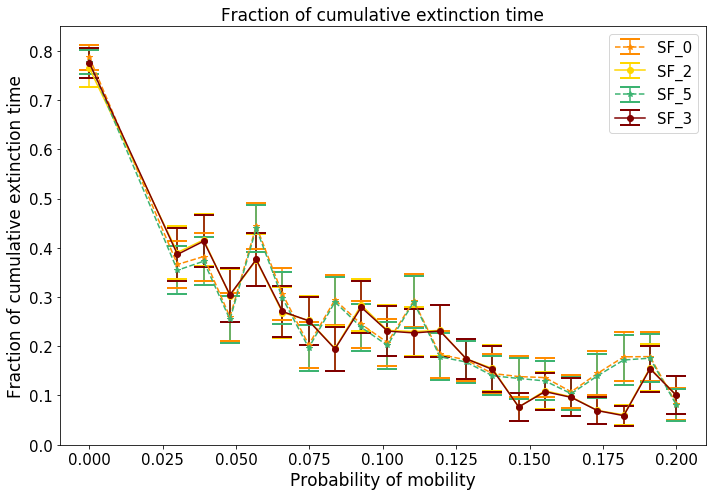

In [14]:

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.errorbar(p_mob_list, ext_sf2_asym, error_ext_sf2_asym, fmt="--", marker="*", capthick=2, 
                                                       color="darkorange", label="SF_0")
ax.errorbar(p_mob_list, ext_sf2_sym, error_ext_sf2_sym, fmt="-o", marker="o", capthick=2, 
                                                       color="gold", label="SF_2")
ax.errorbar(p_mob_list, ext_sf1_asym, error_ext_sf1_asym, fmt="--", marker="*", capthick=2, 
                                                       color="mediumseagreen", label="SF_5")
ax.errorbar(p_mob_list, ext_sf1_sym, error_ext_sf1_sym, fmt="-o", marker="o", capthick=2, 
                                                       color="maroon", label="SF_3")
ax.set_title("Probability of extinction", fontsize=17)
ax.set_xlabel("Probability of mobility", fontsize=17)
ax.set_ylabel("Probability of extinction", fontsize=17)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15, loc='upper right')
fig.tight_layout()
title = "PEXT_coupled_networks_SF.png"
fig.savefig(title)




fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.errorbar(p_mob_list, t_ext_sum_sf2_asym, t_ext_std_sf2_asym, fmt="--", marker="*", capthick=2, 
                                                       color="darkorange", label="SF_0")
ax.errorbar(p_mob_list, t_ext_sum_sf2_sym, t_ext_std_sf2_sym, fmt="-o", marker="o", capthick=2, 
                                                       color="gold", label="SF_2")
ax.errorbar(p_mob_list, t_ext_sum_sf1_asym, t_ext_std_sf1_asym,  fmt="--", marker="*", capthick=2, 
                                                       color="mediumseagreen", label="SF_5")
ax.errorbar(p_mob_list, t_ext_sum_sf1_sym, t_ext_std_sf1_sym, fmt="-o", marker="o", capthick=2, 
                                                       color="maroon", label="SF_3")
ax.set_title("Fraction of cumulative extinction time", fontsize=17)
ax.set_xlabel("Probability of mobility", fontsize=17)
ax.set_ylabel("Fraction of cumulative extinction time", fontsize=17)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15, loc='upper right')

fig.tight_layout()
title = "TEXT_coupled_networks_SF.png"
fig.savefig(title)